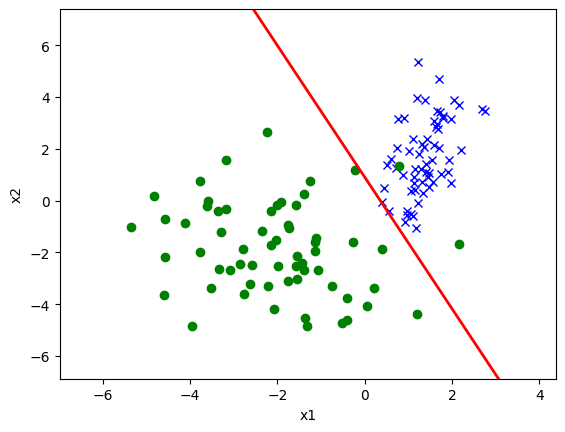

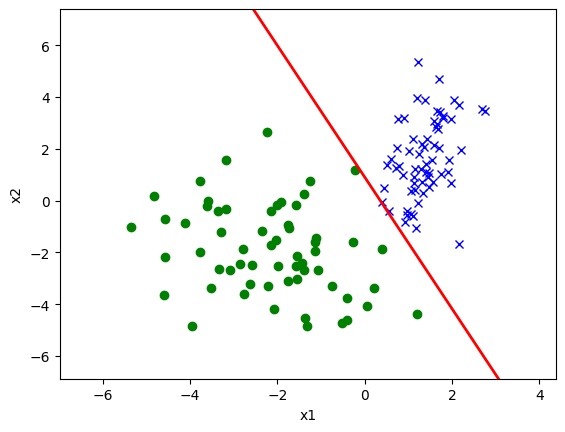

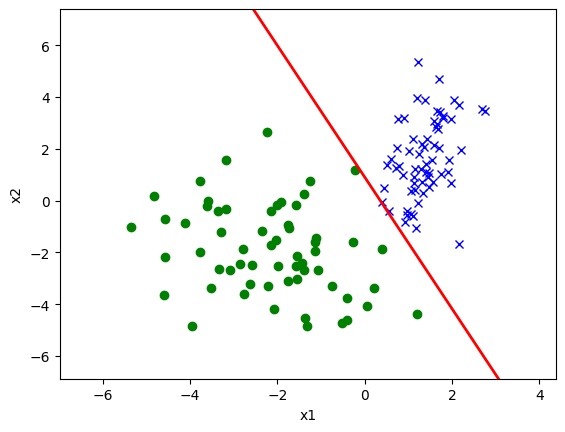

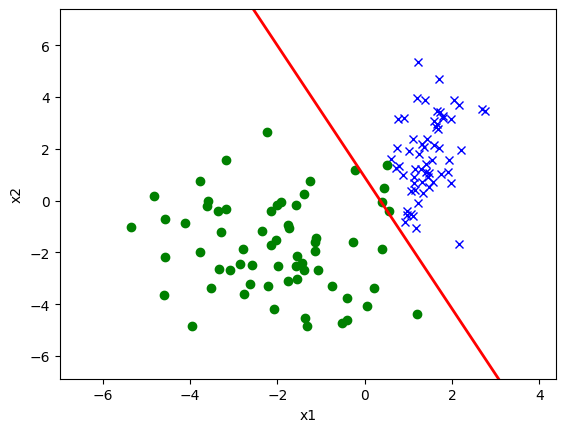

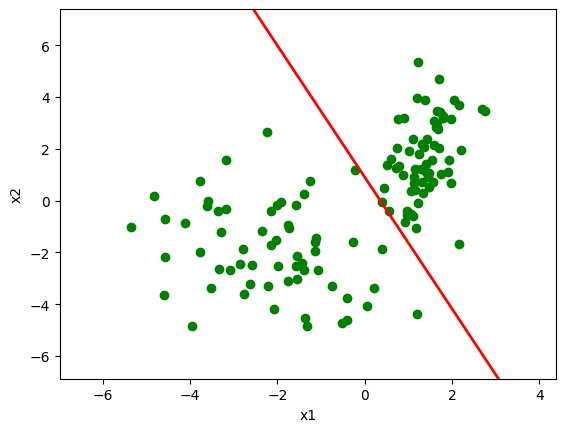

In [22]:
import numpy as np
import util

from p01b_logreg import LogisticRegression

# Character to replace with sub-problem letter in plot_path/pred_path
WILDCARD = 'X'

train_path = "/home/aryan/Desktop/CS229-Solutions/ps1/data/ds3_train.csv"
eval_path = "/home/aryan/Desktop/CS229-Solutions/ps1/data/ds3_valid.csv"
pred_path = "/home/aryan/Desktop/CS229-Solutions/ps1/data/ds3_test.csv"

def main(train_path, valid_path, test_path, pred_path):
    
    x_train, t_train = util.load_dataset(train_path, label_col='t',add_intercept=True)
    clf = LogisticRegression()
    theta = clf.fit(x_train, t_train)
    #util.plot(x_train,t_train,theta)
    #Below only with partial label training
    x1_train, y_train = util.load_dataset(train_path, label_col='y',add_intercept=True)
    theta1 = clf.fit(x1_train, y_train)
    #util.plot(x1_train,y_train,theta1)
    x_eval, y_eval = util.load_dataset(eval_path, label_col='y',add_intercept=True)
    y_pred = clf.predict(x_eval, theta1)
    m = y_eval.shape
    alfa = 0
    V_dim = 0
    for i in range(0,m[0]):
        if(y_eval[i] == 1):
            alfa = alfa + y_pred[i]
            V_dim = V_dim +1
    alfa = alfa/V_dim
    #train test check
    x_test, t_test = util.load_dataset(test_path, label_col='t',add_intercept=True)
    t_pred = clf.predict(x_test, theta)
    m = t_pred.shape
    for i in range (0, m[0]):
        if(t_pred[i]>=0.5):
            t_pred[i] = 1
        else:
            t_pred[i] = 0
    util.plot(x_test,t_test,theta)
    util.plot(x_test,t_pred,theta)
    y_pred = clf.predict(x_test, theta1)
    aprox_t_pred = y_pred/alfa
    for i in range (0, m[0]):
        if(y_pred[i]>=0.5):
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    for i in range (0, m[0]):
        if(aprox_t_pred[i]>=0.5):
            aprox_t_pred[i] = 1
        else:
            aprox_t_pred[i] = 0
    util.plot(x_test, t_pred, theta)
    util.plot(x_test, aprox_t_pred, theta)
    util.plot(x_test, y_pred, theta)

   
main(train_path, eval_path,pred_path,pred_path)